Import stock listing info from the NASDAQ

In this exercise, you will read the file nasdaq-listings.csv with data on companies listed on the NASDAQ and then diagnose issues with the imported data. 
You will fix these issues in the next exercise.

In [1]:
import pandas as pd
from pandas_datareader.data import DataReader

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from datetime import date
import yfinance as yf

In [2]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')
nasdaq

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,AAPL,Apple Inc.,141.05,7.400000e+11,1980,Technology,Computer Manufacturing,4/26/17
1,GOOGL,Alphabet Inc.,840.18,5.810000e+11,NAN,Technology,"Computer Software: Programming, Data Processing",4/24/17
2,GOOG,Alphabet Inc.,823.56,5.690000e+11,2004,Technology,"Computer Software: Programming, Data Processing",4/23/17
3,MSFT,Microsoft Corporation,64.95,5.020000e+11,1986,Technology,Computer Software: Prepackaged Software,4/26/17
4,AMZN,"Amazon.com, Inc.",884.67,4.220000e+11,1997,Consumer Services,Catalog/Specialty Distribution,4/24/17
...,...,...,...,...,...,...,...,...
1110,IFV,First Trust Dorsey Wright International Focus ...,18.78,5.380470e+08,NAN,NAN,NAN,4/23/17
1111,QCRH,"QCR Holdings, Inc.",40.85,5.374372e+08,NAN,Finance,Major Banks,4/25/17
1112,AUPH,Aurinia Pharmaceuticals Inc,6.83,5.364592e+08,NAN,Health Care,Major Pharmaceuticals,4/26/17
1113,ESND,Essendant Inc.,14.30,5.358635e+08,NAN,Consumer Services,Paper,4/23/17


In [3]:
# Inspect nasdaq
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           1115 non-null   object 
 1   Company Name           1115 non-null   object 
 2   Last Sale              1115 non-null   float64
 3   Market Capitalization  1115 non-null   float64
 4   IPO Year               1115 non-null   object 
 5   Sector                 1115 non-null   object 
 6   Industry               1115 non-null   object 
 7   Last Update            1115 non-null   object 
dtypes: float64(2), object(6)
memory usage: 69.8+ KB


When inspecting the output of nasdaq.head(10), did you observe that some of the fields contained the string 'NAN'? However, the output of nasdaq.info() didn't report any missing values. To ensure missing values are imported correctly, you need to explicitly set the na_values argument to the required string.

The 'Last Update' column shows date information upon inspection, but is imported as something other than dtype datetime64. To ensure dates are imported correctly, make use of the parse_dates argument.

In [4]:
# Read data using .read_csv() with adequate parsing arguments

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])
nasdaq

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\3623788316.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,AAPL,Apple Inc.,141.05,7.400000e+11,1980.0,Technology,Computer Manufacturing,2017-04-26
1,GOOGL,Alphabet Inc.,840.18,5.810000e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2017-04-24
2,GOOG,Alphabet Inc.,823.56,5.690000e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",2017-04-23
3,MSFT,Microsoft Corporation,64.95,5.020000e+11,1986.0,Technology,Computer Software: Prepackaged Software,2017-04-26
4,AMZN,"Amazon.com, Inc.",884.67,4.220000e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,2017-04-24
...,...,...,...,...,...,...,...,...
1110,IFV,First Trust Dorsey Wright International Focus ...,18.78,5.380470e+08,NaN,NaN,NaN,2017-04-23
1111,QCRH,"QCR Holdings, Inc.",40.85,5.374372e+08,NaN,Finance,Major Banks,2017-04-25
1112,AUPH,Aurinia Pharmaceuticals Inc,6.83,5.364592e+08,NaN,Health Care,Major Pharmaceuticals,2017-04-26
1113,ESND,Essendant Inc.,14.30,5.358635e+08,NaN,Consumer Services,Paper,2017-04-23


In [5]:
# Inspect the data
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           1115 non-null   object        
 1   Company Name           1115 non-null   object        
 2   Last Sale              1115 non-null   float64       
 3   Market Capitalization  1115 non-null   float64       
 4   IPO Year               593 non-null    float64       
 5   Sector                 1036 non-null   object        
 6   Industry               1036 non-null   object        
 7   Last Update            1115 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 69.8+ KB


In [6]:
# Load listing info from a single sheet
# Import the data
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.000000e+00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.000000e+00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,3.325561e+08,2014.0,Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals


In [7]:
# Inspect the data
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


Load listing data from two sheets

The import process is just as intuitive when using the sheet_names attribute of a pd.ExcelFile() object.

Passing in a list as the sheet_name argument of pd.read_excel(), whether you assign the list to a variable holding the sheet_names attribute of a pd.ExcelFile() object or type the list out yourself, constructs a dictionary. In this dictionary, the keys are the names of the sheets, and the values are the DataFrames containing the data from the corresponding sheet. You can extract values from a dictionary by providing a particular key in brackets.

In this exercise, you will retrieve the list of stock exchanges from listings.xlsx and then use this list to read the data for all three exchanges into a dictionary. 

In [8]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names
exchanges

['amex', 'nasdaq', 'nyse']

In [9]:
# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')
listings.keys()


C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


dict_keys(['amex', 'nasdaq', 'nyse'])

In [10]:
listings['nasdaq']

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,AAPL,Apple Inc.,141.05,7.400245e+11,1980.0,Technology,Computer Manufacturing
1,GOOGL,Alphabet Inc.,840.18,5.809175e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
2,GOOG,Alphabet Inc.,823.56,5.694261e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
3,MSFT,Microsoft Corporation,64.95,5.019031e+11,1986.0,Technology,Computer Software: Prepackaged Software
4,AMZN,"Amazon.com, Inc.",884.67,4.221385e+11,1997.0,Consumer Services,Catalog/Specialty Distribution
...,...,...,...,...,...,...,...
3162,WSFSL,WSFS Financial Corporation,25.70,0.000000e+00,NaN,Finance,Major Banks
3163,XGTIW,"XG Technology, Inc",6.56,0.000000e+00,2013.0,Consumer Durables,Telecommunications Equipment
3164,ZNWAA,Zion Oil & Gas Inc,NaN,0.000000e+00,NaN,Energy,Oil & Gas Production
3165,ZIONW,Zions Bancorporation,9.87,0.000000e+00,NaN,Finance,Major Banks


In [11]:
# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


In [12]:
# Load all listing data and iterate over key-value dictionary pairs

# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   M

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 
combined_listings

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software,NYSE
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments,NYSE
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,NYSE
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing",NYSE
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines,NYSE
...,...,...,...,...,...,...,...,...
3162,WSFSL,WSFS Financial Corporation,25.70,0.000000e+00,NaN,Finance,Major Banks,NASDAQ
3163,XGTIW,"XG Technology, Inc",6.56,0.000000e+00,2013.0,Consumer Durables,Telecommunications Equipment,NASDAQ
3164,ZNWAA,Zion Oil & Gas Inc,NaN,0.000000e+00,NaN,Energy,Oil & Gas Production,NASDAQ
3165,ZIONW,Zions Bancorporation,9.87,0.000000e+00,NaN,Finance,Major Banks,NASDAQ


In [14]:
# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

print(len(listings))
print(type(listings))
listings[0]

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3
<class 'list'>


C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...,...
355,WYY,WidePoint Corporation,0.4350,3.602423e+07,NaN,Technology,EDP Services,amex
356,WTT,"Wireless Telecom Group, Inc.",1.5200,3.380309e+07,NaN,Capital Goods,Electrical Products,amex
357,XTNT,"Xtant Medical Holdings, Inc.",0.5300,9.589080e+06,NaN,Health Care,Biotechnology: Biological Products (No Diagnos...,amex
358,YUMA,"Yuma Energy, Inc.",2.6150,3.190562e+07,NaN,Energy,Oil & Gas Production,amex


In [15]:
# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

listing_data

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.3000,0.000000e+00,NaN,NaN,NaN,nyse
3143,ZBK,Zions Bancorporation,28.8600,0.000000e+00,NaN,Finance,Major Banks,nyse
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014.0,Consumer Services,Restaurants,nyse
3145,ZTS,Zoetis Inc.,53.1000,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals,nyse


In [16]:
# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


Get stock data for a single company

In [17]:
# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

In [18]:
# Set the ticker
ticker_AAPL = 'AAPL'

stock_prices_AAPL = yf.download(ticker_AAPL, start=start, end=end)

stock_prices_AAPL

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.860580,23.865111,23.101844,23.240002,270597600
2016-01-05,23.262650,23.973824,23.194704,23.951175,223164000
2016-01-06,22.807413,23.185651,22.619429,22.775705,273829600
2016-01-07,21.844837,22.678316,21.840308,22.349908,324377600
2016-01-08,21.960340,22.447291,21.915043,22.320458,283192000
...,...,...,...,...,...
2016-12-23,26.977627,26.977627,26.762306,26.762306,56998000
2016-12-27,27.148956,27.273982,26.970679,26.977624,73187600


In [19]:
# Set the ticker
ticker_META = 'META'

stock_prices_META = yf.download(ticker_META, start=start, end=end)

stock_prices_META

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2016-01-04,101.831009,101.850929,99.370407,101.562032,37912400
2016-01-05,102.339073,103.315340,101.283102,102.498460,23258200
2016-01-06,102.578163,103.375114,100.516041,100.745161,25096200
2016-01-07,97.547379,101.044024,96.929743,100.117563,45172900
2016-01-08,96.959625,100.117560,96.660764,99.499917,35402300
...,...,...,...,...,...
2016-12-23,116.823738,117.112635,115.857436,116.554769,10890000
2016-12-27,117.560921,118.228369,116.415295,116.514913,12051500


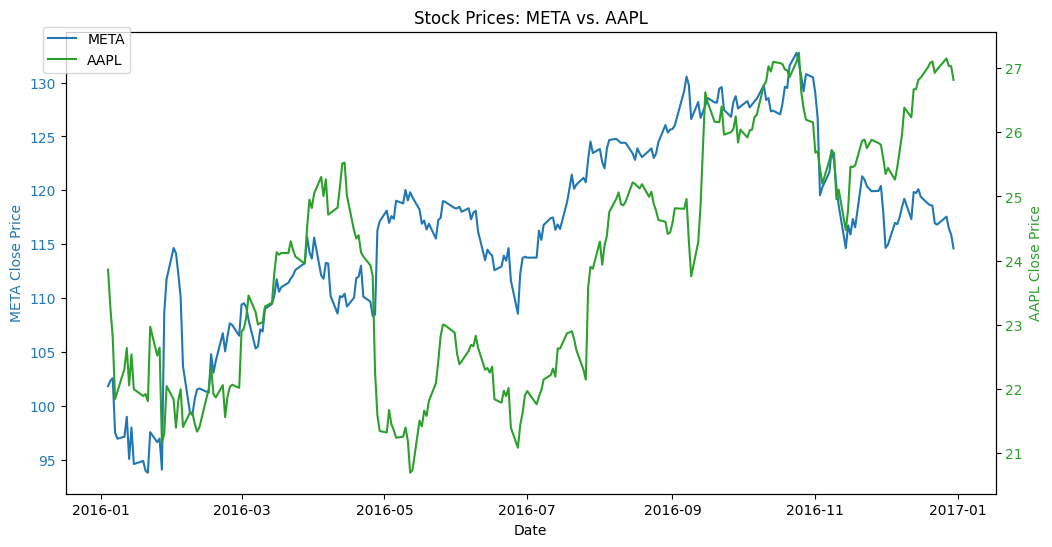

In [20]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot META on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('META Close Price', color=color)
ax1.plot(stock_prices_META['Close'], color=color, label='META')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('AAPL Close Price', color=color)
ax2.plot(stock_prices_AAPL['Close'], color=color, label='AAPL')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Stock Prices: META vs. AAPL')

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


Visualize the long-term oil price trend

Retrieve data from the Federal Reserve Economic Data (FRED) portal.

Here, you will use this new data source to visualize the oil price trend over the last 50 years, specifically, the Spot Crude Oil Price: West Texas Intermediate (WTI).

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 684 entries, 1968-01-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTISPLC  684 non-null    float64
dtypes: float64(1)
memory usage: 10.7 KB


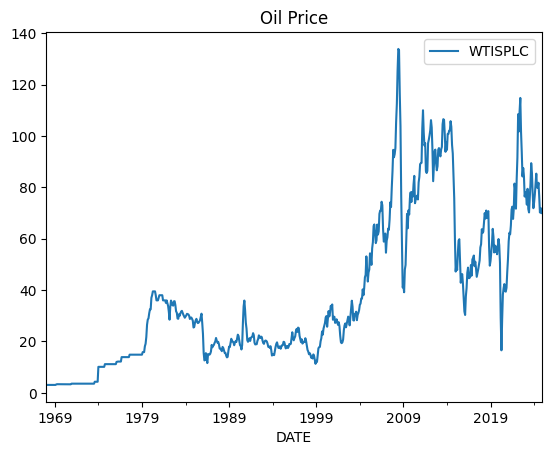

In [21]:
# Set start date
start = date(1968, 1, 1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start=start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
oil_price.plot(title='Oil Price')

# Show the plot
plt.show()

Compare labor market participation and unemployment rates

Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

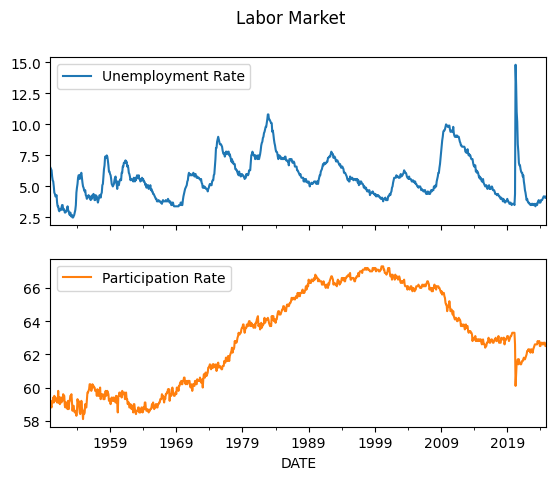

In [22]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

Compare bond and stock performance

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Yahoo! Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

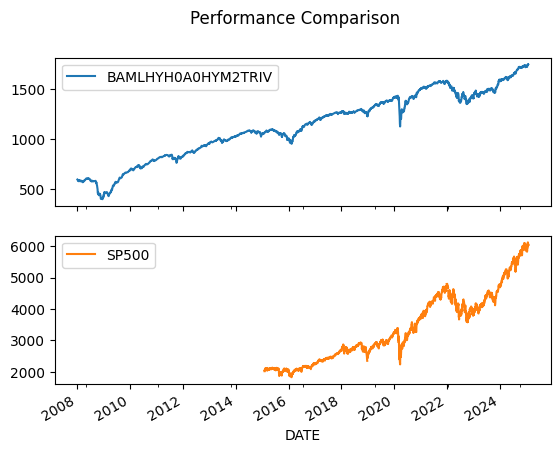

In [23]:
# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

Select the top 5 listed consumer 

As you have just learned, it is possible to filter stocks based on criteria with the sort_values() method and an argument that specifies the column to filter by. Additionally, you can include the argument ascending=False to sort entries from highest to lowest.

Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company. The listing_data DataFrame to be used (as a refresher, it contains data from the AMEX, NYSE, and NASDAQ.)

In [24]:
listing_data.sort_values('Market Capitalization', ascending=False)

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,AAPL,Apple Inc.,141.05,7.400245e+11,1980.0,Technology,Computer Manufacturing,nasdaq
1,GOOGL,Alphabet Inc.,840.18,5.809175e+11,NaN,Technology,"Computer Software: Programming, Data Processing",nasdaq
2,GOOG,Alphabet Inc.,823.56,5.694261e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",nasdaq
3,MSFT,Microsoft Corporation,64.95,5.019031e+11,1986.0,Technology,Computer Software: Prepackaged Software,nasdaq
4,AMZN,"Amazon.com, Inc.",884.67,4.221385e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,nasdaq
...,...,...,...,...,...,...,...,...
2968,EACQW,Easterly Acquisition Corp.,0.45,0.000000e+00,2015.0,Capital Goods,Building Products,nasdaq
2969,EVGBC,Eaton Vance NextShares Trust,99.97,0.000000e+00,NaN,NaN,NaN,nasdaq
2970,EVSTC,Eaton Vance NextShares Trust,99.97,0.000000e+00,NaN,NaN,NaN,nasdaq
2971,EVLMC,Eaton Vance NextShares Trust II,99.94,0.000000e+00,NaN,NaN,NaN,nasdaq


In [25]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head()

,Company Name,Exchange,Market Capitalization
4,"Amazon.com, Inc.",nasdaq,4.221385e+11
3013,"Wal-Mart Stores, Inc.",nyse,2.218646e+11
3014,Walt Disney Company (The),nyse,1.789973e+11
6,Comcast Corporation,nasdaq,1.764745e+11
1438,"Home Depot, Inc. (The)",nyse,1.752626e+11


Get the ticker of the largest consumer services company

Instead of indexing your data with a conditional expression, you can also filter by certain values with .loc[row_selector, column_selector]. Additionally, you can use .set_index() to set a particular column with unique values as the index of a DataFrame, and .idxmax() to return the index of the maximum value.

In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend.

In [26]:
listing_data['Stock Symbol'].value_counts()

Stock Symbol
FCFS    2
RRD     2
AMOV    2
PGTI    2
MSG     2
       ..
ADRE    1
HRZN    1
CLDC    1
HDNG    1
ZTO     1
Name: count, Length: 6669, dtype: int64

In [27]:
# Set the index of listings to Stock Symbol
listings_ss = listing_data.set_index('Stock Symbol')
listings_ss


,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
Stock Symbol,,,,,,,
XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...
ZB^H,Zions Bancorporation,25.3000,0.000000e+00,NaN,NaN,NaN,nyse
ZBK,Zions Bancorporation,28.8600,0.000000e+00,NaN,Finance,Major Banks,nyse
ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014.0,Consumer Services,Restaurants,nyse


In [28]:
# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector == 'Consumer Services', 'Market Capitalization'].idxmax()
ticker


'AMZN'

In [29]:
# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = yf.download(ticker, start=start)

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2015-01-02,15.426000,15.737500,15.348000,15.629000,55664000
2015-01-05,15.109500,15.419000,15.042500,15.350500,55484000
2015-01-06,14.764500,15.150000,14.619000,15.112000,70380000
2015-01-07,14.921000,15.064000,14.766500,14.875000,52806000
2015-01-08,15.023000,15.157000,14.805500,15.016000,61768000
...,...,...,...,...,...
2025-01-23,235.419998,235.520004,231.509995,234.100006,26404400
2025-01-24,234.850006,236.399994,232.929993,234.500000,25890700


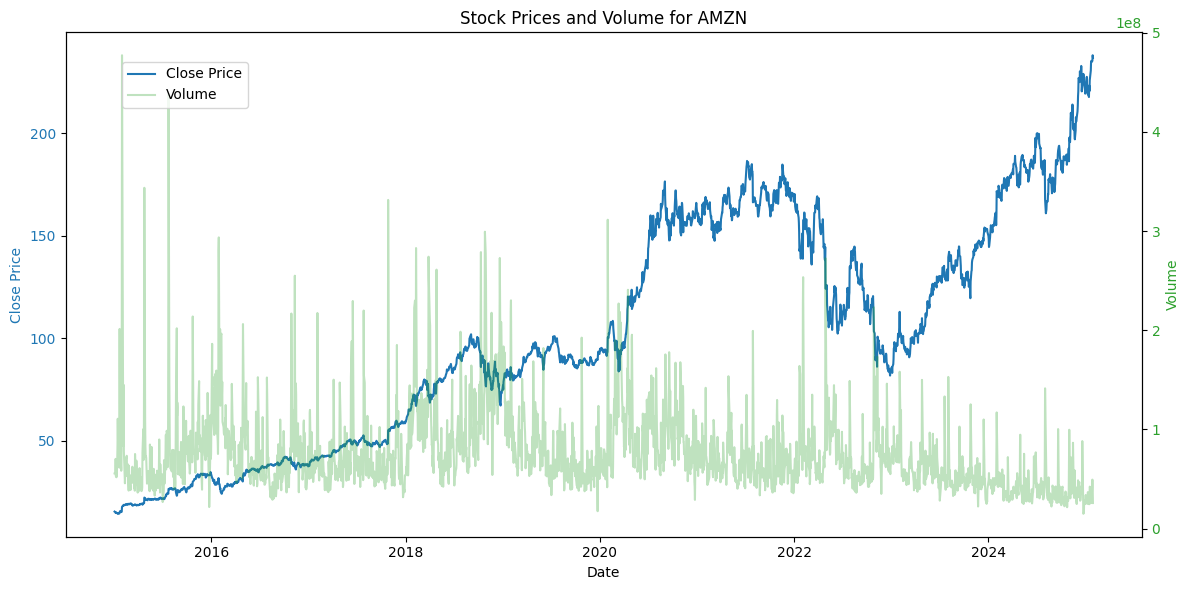

In [30]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the 'Close' price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(data.index, data['Close'], color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Volume', color=color)
ax2.plot(data.index, data['Volume'], color=color, label='Volume', alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title(f'Stock Prices and Volume for {ticker}')
fig.tight_layout()  # Ensure everything fits without overlap
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


Get the largest consumer company listed after 1998

You can filter your data by even more conditions by enclosing each condition in parentheses and using logical operators like & and |.

Here, you will find out which company is the largest consumer services company that went public after Amazon did in 1997. The data is contained in the column 'IPO Year'; an Initial Public Offering (IPO) is a financial term that describes the first time that the stock of a private company is offered to the public.

In [31]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listings_ss.loc[(listings_ss.Sector == 'Consumer Services') & (listings_ss['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

ticker

'NFLX'

In [32]:
# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = yf.download(ticker, start=start)

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2015-01-02,49.848572,50.331429,48.731430,49.151428,13475000
2015-01-05,47.311428,49.258572,47.147144,49.258572,18165000
2015-01-06,46.501431,47.639999,45.661430,47.347141,16037700
2015-01-07,46.742859,47.421429,46.271427,47.347141,9849700
2015-01-08,47.779999,47.835712,46.478573,47.119999,9601900
...,...,...,...,...,...
2025-01-23,984.859985,985.000000,953.900024,957.809998,7752100
2025-01-24,977.590027,986.280029,967.679993,984.409973,4550400


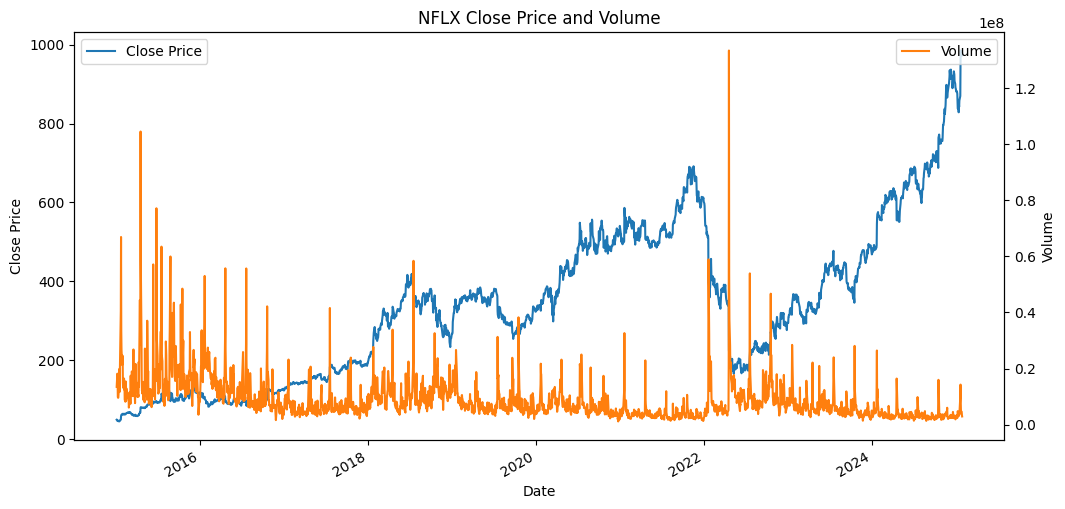

In [33]:
# Plot close and volume
ax = data['Close'].plot(title=f'{ticker} Close Price and Volume', figsize=(12, 6), label='Close Price')
ax.set_ylabel('Close Price')
data['Volume'].plot(secondary_y=True, ax=ax, label='Volume')
ax.right_ax.set_ylabel('Volume')

# Add legends with correct labels
ax.legend(['Close Price'], loc='upper left')
ax.right_ax.legend(['Volume'], loc='upper right')

# Show the plot
plt.show()



Get data for the 3 largest financial companies

A pd.MultiIndex() object has more than one identifier per row. This allows you to get the data based on criteria for multiple companies at once.

In [34]:
# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector=='Finance', 'Market Capitalization'].nlargest(n=3)
top_3_companies


Stock Symbol
JPM    3.002833e+11
WFC    2.569488e+11
BAC    2.236668e+11
Name: Market Capitalization, dtype: float64

In [35]:
# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

top_3_tickers

['JPM', 'WFC', 'BAC']

In [36]:
# Set start date
start = date(2015, 1, 1)

# Set end date
end = date(2020, 4, 1)

# Import stock data
result = yf.download(top_3_tickers, start=start, end=end)
result


[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker            BAC        JPM        WFC        BAC        JPM        WFC   
Date                                                                           
2015-01-02  14.532611  47.464828  41.032391  14.638156  47.821819  41.399955   
2015-01-05  14.110435  45.991280  39.907192  14.459543  47.305316  40.777349   
2015-01-06  13.688259  44.798775  39.074547  14.159148  46.143194  40.109734   
2015-01-07  13.753210  44.867134  39.307072  13.948061  45.489972  39.487102   
2015-01-08  14.037367  45.869743  40.177227  14.077960  46.257120  40.199730   
...               ...        ...        ...        ...        ...        ...   
2020-03-25  18.751844  79.485748  25.631123  19.640557  82.449240  26.807836   
2020-03-26  20.191557  85.022789  27.338684  20.395962  85.412720  27.772210   
2020-03-27  19.196199  78.965820  26.790148  19.729428  82.180603  27.683743   
2020-03-30  19.587236  81.019470  26.471634  19.862737  81.530713  26.967092   
2020-03-31  18.867380  78.012657  25.392246  19.987159  81.600043  26.321230   

Price             Low                             Open                        \
Ticker            BAC        JPM        WFC        BAC        JPM        WFC   
Date                                                                           
2015-01-02  14.353998  47.145812  40.649820  14.605680  47.229364  41.339946   
2015-01-05  14.037368  45.748221  39.832177  14.443307  47.138215  40.612318   
2015-01-06  13.623309  44.320252  38.894513  14.142910  46.059642  40.019716   
2015-01-07  13.696379  44.563309  39.089532  13.915585  45.489972  39.479602   
2015-01-08  13.883110  45.550730  39.727144  13.931822  45.550730  39.757150   
...               ...        ...        ...        ...        ...        ...   
2020-03-25  18.138632  73.255478  24.569427  19.293958  77.328112  25.657666   
2020-03-26  18.814053  81.054133  25.728445  18.938472  81.522054  25.949631   
2020-03-27  18.751843  78.463245  25.728450  19.267296  80.750853  26.560113   
2020-03-30  18.902927  77.380096  25.560344  19.240637  78.549894  26.860923   
2020-03-31  18.627427  77.414757  24.914482  19.391721  79.763028  26.020416   

Price          Volume                      
Ticker            BAC       JPM       WFC  
Date                                       
2015-01-02   48951100  12600000  11700900  
2015-01-05  105605500  20100600  15000500  
2015-01-06  144912400  29074100  20211200  
2015-01-07  104603800  23843200  15714700  
2015-01-08   73388500  16971100  16721600  
...               ...       ...       ...  
2020-03-25  146991300  38111700  53341100  
2020-03-26  116111400  29826300  45494700  
2020-03-27   91522800  30041500  38942800  
2020-03-30   80449100  21656900  41232800  
2020-03-31   95213700  23379300  36920300  

[1320 rows x 15 columns]

In [37]:
# Apply stack method 
data = result.stack()

data

Price                  Close       High        Low       Open     Volume
Date       Ticker                                                       
2015-01-02 BAC     14.532611  14.638156  14.353998  14.605680   48951100
           JPM     47.464828  47.821819  47.145812  47.229364   12600000
           WFC     41.032391  41.399955  40.649820  41.339946   11700900
2015-01-05 BAC     14.110435  14.459543  14.037368  14.443307  105605500
           JPM     45.991280  47.305316  45.748221  47.138215   20100600
...                      ...        ...        ...        ...        ...
2020-03-30 JPM     81.019470  81.530713  77.380096  78.549894   21656900
           WFC     26.471634  26.967092  25.560344  26.860923   41232800
2020-03-31 BAC     18.867380  19.987159  18.627427  19.391721   95213700
           JPM     78.012657  81.600043  77.414757  79.763028   23379300
           WFC     25.392246  26.321230  24.914482  26.020416   36920300

[3960 rows x 5 columns]

In [38]:
# Unstack and inspect result
data['Close'].unstack()

Ticker,BAC,JPM,WFC
Date,,,
2015-01-02,14.532611,47.464828,41.032391
2015-01-05,14.110435,45.991280,39.907192
2015-01-06,13.688259,44.798775,39.074547
2015-01-07,13.753210,44.867134,39.307072
2015-01-08,14.037367,45.869743,40.177227
...,...,...,...
2020-03-25,18.751844,79.485748,25.631123
2020-03-26,20.191557,85.022789,27.338684
2020-03-27,19.196199,78.965820,26.790148


In [39]:
data['Close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1320 entries, 2015-01-02 to 2020-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAC     1320 non-null   float64
 1   JPM     1320 non-null   float64
 2   WFC     1320 non-null   float64
dtypes: float64(3)
memory usage: 41.2 KB


List the poorest and richest countries worldwide

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

In [40]:
# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [41]:
# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

income

,Country,Income per Capita
133,Qatar,141542.662800
97,"Macao SAR, China",111496.629400
96,Luxembourg,102051.680300
144,Singapore,85382.302270
23,Brunei Darussalam,78369.291020
...,...,...
121,Niger,955.483324
94,Liberia,835.366935
37,"Congo, Dem. Rep.",784.365232
26,Burundi,727.150789


Global incomes: Central tendency

The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11.

In [42]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573696
11620.93252


0    1.0
Name: Income per Capita (,000), dtype: float64

In [43]:
income

,Country,Income per Capita,"Income per Capita (,000)"
133,Qatar,141542.662800,141.0
97,"Macao SAR, China",111496.629400,111.0
96,Luxembourg,102051.680300,102.0
144,Singapore,85382.302270,85.0
23,Brunei Darussalam,78369.291020,78.0
...,...,...,...
121,Niger,955.483324,0.0
94,Liberia,835.366935,0.0
37,"Congo, Dem. Rep.",784.365232,0.0
26,Burundi,727.150789,0.0


In [44]:
income['Income per Capita (,000)'].value_counts().head()

Income per Capita (,000)
1.0    18
2.0    12
3.0    12
5.0     9
6.0     7
Name: count, dtype: int64

Global incomes: Dispersion

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

In [45]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

[-2497.4416414691186, 41436.280772943035]


In [46]:
# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([0.25, 0.75])
print(quantiles)

0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64


In [47]:
# Calculate and print IQR
iqr = quantiles[0.75] - quantiles[0.25]
print(iqr)

22636.395729999997


Deciles of the global income distribution

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)

A standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

In [48]:
# Generate range of deciles
quantiles = np.arange(0.1,0.91,0.1)

# Print them
print(quantiles)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [49]:
# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


In [50]:
min(income['Income per Capita']), max(income['Income per Capita'])

(618.7528586, 141542.6628)

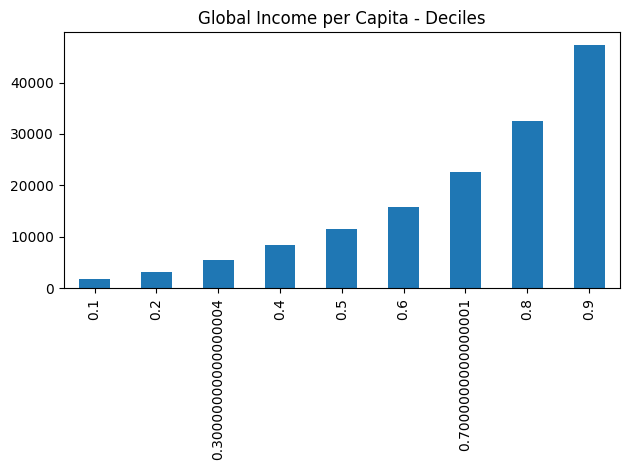

In [51]:
# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

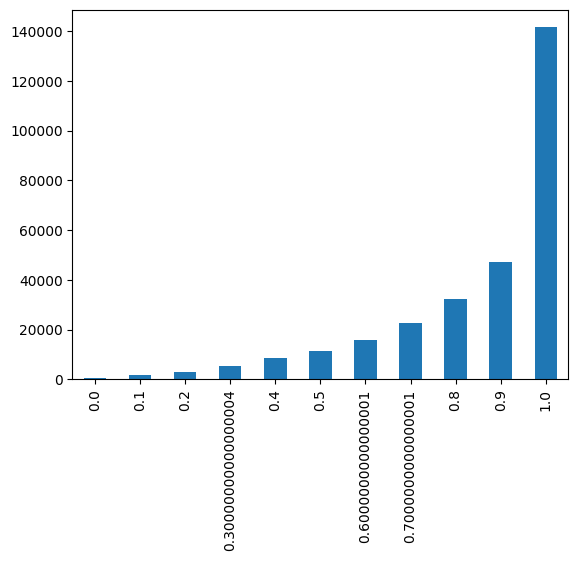

In [52]:
income['Income per Capita'].quantile(np.arange(0,1.1,0.1)).plot(kind='bar')

Getting all the statistics

You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method. The default value of its optional percentiles argument corresponds with quartiles, but you can supply your own list of percentiles, as instead:

In [53]:
income.describe(percentiles=[.25, .5, .75])

,Income per Capita,"Income per Capita (,000)"
count,184.000000,184.000000
mean,19469.419566,18.967391
std,21966.861207,21.975869
min,618.752859,0.000000
25%,3922.358940,3.000000
50%,11620.932520,11.000000
75%,26558.754670,26.000000
max,141542.662800,141.000000


In [54]:
income

,Country,Income per Capita,"Income per Capita (,000)"
133,Qatar,141542.662800,141.0
97,"Macao SAR, China",111496.629400,111.0
96,Luxembourg,102051.680300,102.0
144,Singapore,85382.302270,85.0
23,Brunei Darussalam,78369.291020,78.0
...,...,...,...
121,Niger,955.483324,0.0
94,Liberia,835.366935,0.0
37,"Congo, Dem. Rep.",784.365232,0.0
26,Burundi,727.150789,0.0


In [55]:
Country_maxincome = income.Country[income['Income per Capita'].idxmax()]
Country_maxincome

'Qatar'

In [56]:
median_income = income['Income per Capita'].median()
median_income

11620.93252

In [57]:
India_income = income[income.Country=='India']['Income per Capita']
India_income

74    6104.576245
Name: Income per Capita, dtype: float64

In [58]:
median_income - India_income

74    5516.356275
Name: Income per Capita, dtype: float64

In [59]:
income.describe(percentiles=[0.8])

,Income per Capita,"Income per Capita (,000)"
count,184.000000,184.000000
mean,19469.419566,18.967391
std,21966.861207,21.975869
min,618.752859,0.000000
50%,11620.932520,11.000000
80%,32517.693902,31.800000
max,141542.662800,141.000000


Visualizing international income distribution

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\3107465600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(income['Income per Capita'])


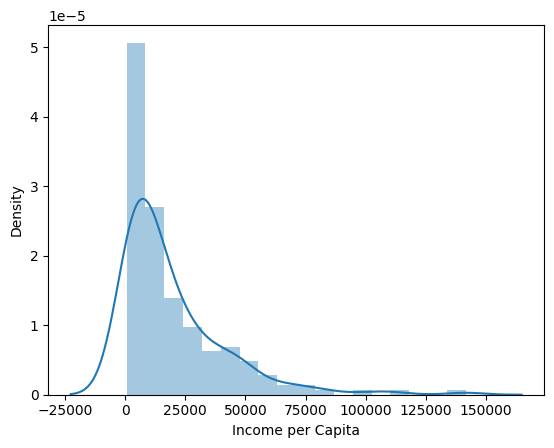

In [60]:
# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()


C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\2561738641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)


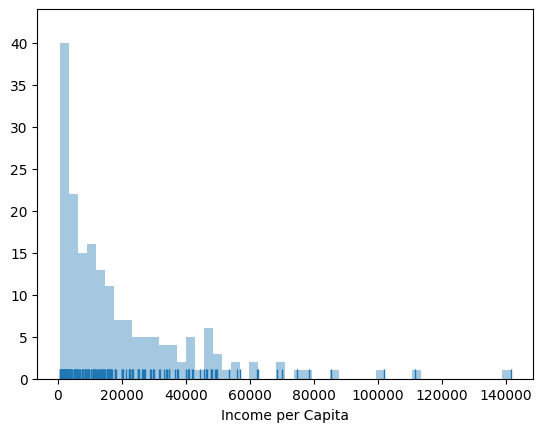

In [61]:
# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

Growth rates in Brazil, China, and the US

It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The 'income_growth.csv' file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

In [62]:
# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

,China,Brazil,USA
count,40.000000,40.000000,40.000000
mean,0.083084,0.013315,0.018239
std,0.032205,0.033211,0.019386
min,-0.030813,-0.066154,-0.036241
25%,0.067948,-0.005524,0.009093
50%,0.085920,0.016912,0.019851
75%,0.099599,0.032199,0.030144
max,0.136383,0.071762,0.063344


In [63]:
growth

,China,Brazil,USA
DATE,,,
1976-01-01,-0.030813,0.071762,0.043894
1977-01-01,0.061140,0.021236,0.035617
1978-01-01,0.101823,0.007905,0.044491
1979-01-01,0.061742,0.042530,0.020433
1980-01-01,0.064630,0.065588,-0.011973
1981-01-01,0.038338,-0.066154,0.015925
1982-01-01,0.073419,-0.017348,-0.028415
1983-01-01,0.092452,-0.055917,0.036801
1984-01-01,0.136383,0.029616,0.063344


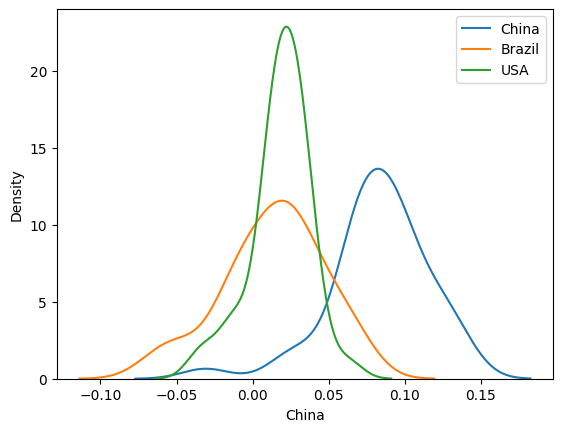

In [64]:
# Iterate over the three columns
for column in growth.columns:
    sns.kdeplot(growth[column], label=column)
    
# Show the plot
plt.legend()
plt.show()

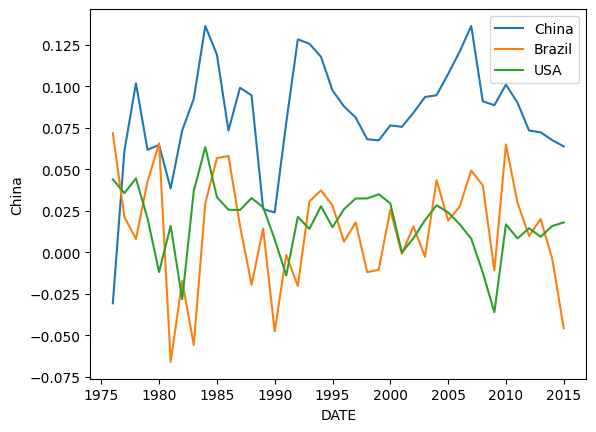

In [65]:
# Iterate over the three columns
for column in growth.columns:
    sns.lineplot(growth[column], label=column)
    
# Show the plot
plt.legend()
plt.show()

Highlighting values in the distribution

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.

You can also to emphasize a particular value in a plot by adding a vertical line at position x across the axes:

Axes.axvline(x=0, color=None, ...)

In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values.

In [66]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

inc_per_capita

71     56923.490540
175    56115.718430
139    53538.790430
118    49587.005190
8      49429.555550
           ...     
121      955.483324
94       835.366935
37       784.365232
26       727.150789
31       618.752859
Name: Income per Capita, Length: 174, dtype: float64

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\1010930938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(inc_per_capita)


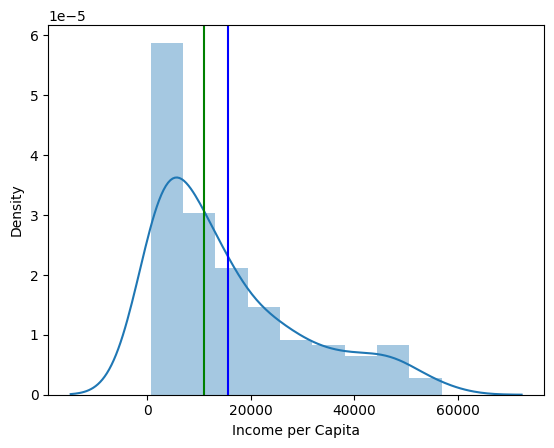

In [67]:
# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

Companies by sector on all exchanges

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

Think back to the stock exchange data from the earlier chapters. The .mean() function isn't very helpful for understanding the frequency of 'Sector' values such as 'Technology' and 'Finance', whereas .value_counts() and .nunique() are.

In this exercise, you will compare the distribution of listings in the AMEX, NASDAQ, and NYSE per sector. 

In [68]:
listings_dict = {'amex':listings[0], 'nasdaq':listings[1], 'nyse':listings[2]}
listings_dict

{'amex':        Stock Symbol                                       Company Name  \
 0              XXII                            22nd Century Group, Inc   
 1               FAX              Aberdeen Asia-Pacific Income Fund Inc   
 2               IAF                 Aberdeen Australia Equity Fund Inc   
 3                CH                          Aberdeen Chile Fund, Inc.   
 4    ABE             Aberdeen Emerging Markets Smaller Company Oppo...   
 ..              ...                                                ...   
 355             WYY                              WidePoint Corporation   
 356             WTT                      Wireless Telecom Group,  Inc.   
 357            XTNT                       Xtant Medical Holdings, Inc.   
 358            YUMA                                  Yuma Energy, Inc.   
 359            ZDGE                                        Zedge, Inc.   
 
      Last Sale  Market Capitalization  IPO Year                 Sector  \
 0       1.3300

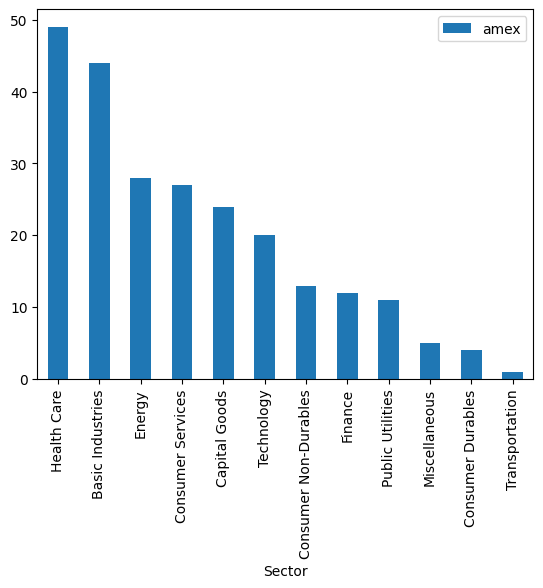

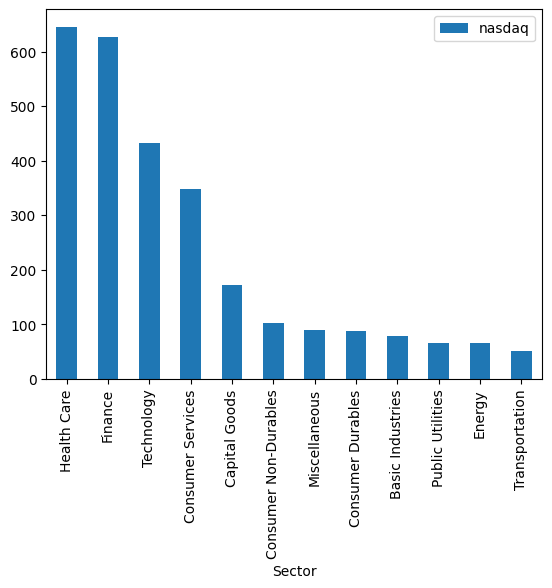

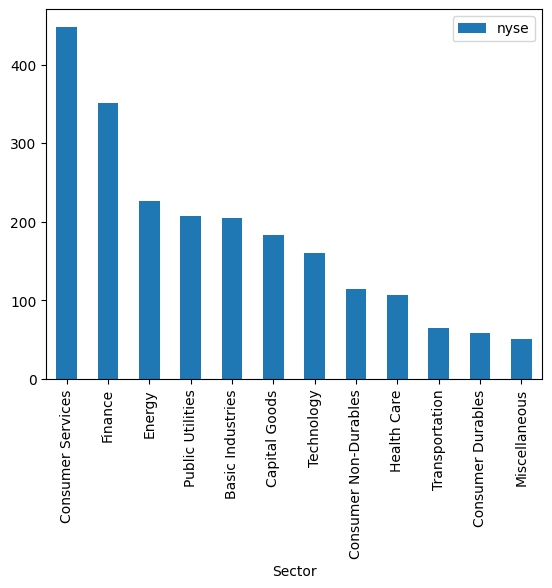

In [69]:
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings_dict[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar', label=exchange)
    # Show the plot
    plt.legend()
    plt.show()

Technology IPOs by year on all exchanges

Each company in the listings dictionary has an IPO year between 1972 and 2017. Therefore, in this context, it is appropriate to consider the 'IPO Year' column of each sheet as a categorical variable with a well-defined order even though it is of dtype float64.

Here you will combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector. 

In [70]:
# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']
tech_companies

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
14,ACY,AeroCentury Corp.,10.000,1.566699e+07,NaN,Technology,Diversified Commercial Services,amex
45,BGSF,BG Staffing Inc,14.900,1.302257e+08,NaN,Technology,Professional Services,amex
56,BDR,"Blonder Tongue Laboratories, Inc.",0.525,4.263963e+06,NaN,Technology,Radio And Television Broadcasting And Communic...,amex
77,CVR,Chicago Rivet & Machine Co.,39.700,3.835544e+07,NaN,Technology,Industrial Machinery/Components,amex
133,EMAN,eMagin Corporation,2.400,7.590364e+07,NaN,Technology,Semiconductors,amex
...,...,...,...,...,...,...,...,...
3116,XTLY,Xactly Corporation,11.450,3.608941e+08,2015.0,Technology,Computer Software: Prepackaged Software,nyse
3129,YGE,Yingli Green Energy Holding Company Limited,2.810,5.107562e+07,2007.0,Technology,Semiconductors,nyse
3134,YUME,"YuMe, Inc.",3.850,1.310482e+08,2013.0,Technology,Advertising,nyse
3136,ZEN,"Zendesk, Inc.",28.180,2.772825e+09,2014.0,Technology,EDP Services,nyse


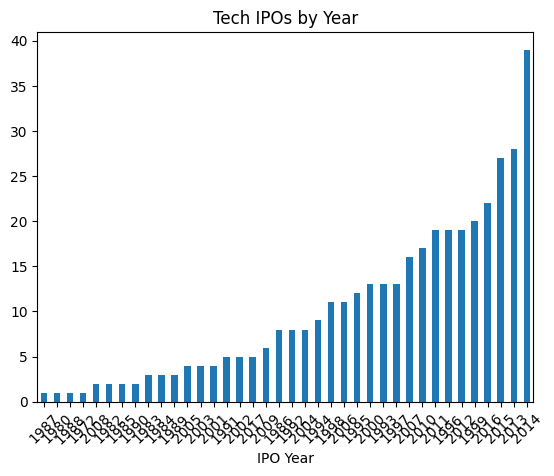

In [71]:
# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

Median market capitalization by sector

You have seen previously that the market capitalization data has large outliers. To get a more robust summary of the market value of companies in each sector, you will calculate the median market capitalization by sector.

In [74]:
# Inspect NYSE data
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
 7   Exchange               3147 non-null   object 
dtypes: float64(3), object(5)
memory usage: 196.8+ KB


In [75]:
# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

nyse

,Stock Symbol,Company Name,Last Sale,IPO Year,Sector,Industry,Exchange,market_cap_m
0,DDD,3D Systems Corporation,14.48,NaN,Technology,Computer Software: Prepackaged Software,NYSE,1647.165276
1,MMM,3M Company,188.65,NaN,Health Care,Medical/Dental Instruments,NYSE,112736.642168
2,WBAI,500.com Limited,13.96,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,NYSE,579.312876
3,WUBA,58.com Inc.,36.11,2013.0,Technology,"Computer Software: Programming, Data Processing",NYSE,5225.238185
4,AHC,A.H. Belo Corporation,6.20,NaN,Consumer Services,Newspapers/Magazines,NYSE,134.735089
...,...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,NaN,NaN,NaN,NYSE,0.000000
3143,ZBK,Zions Bancorporation,28.86,NaN,Finance,Major Banks,NYSE,0.000000
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,2014.0,Consumer Services,Restaurants,NYSE,332.556067
3145,ZTS,Zoetis Inc.,53.10,2013.0,Health Care,Major Pharmaceuticals,NYSE,26105.442924


In [79]:
# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector['market_cap_m'].median()

median_mcap_by_sector

Sector
Basic Industries         2450.240499
Capital Goods            3215.112817
Consumer Durables        2982.585002
Consumer Non-Durables    4701.717926
Consumer Services        1784.206237
Energy                   1838.883585
Finance                  2177.155208
Health Care              5879.060322
Miscellaneous            3734.555829
Public Utilities         4087.367768
Technology               2077.509267
Transportation            798.215734
Name: market_cap_m, dtype: float64

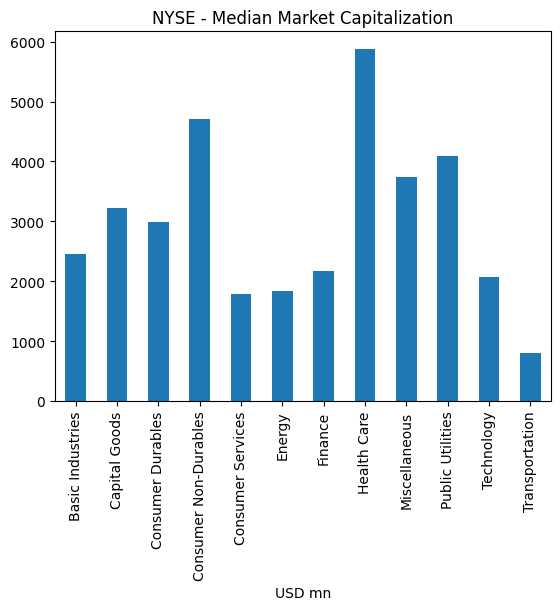

In [80]:
# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='bar', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

Median market capitalization by IPO year

In the last lesson of the previous chapter, you created a timeline for the number of IPOs per year for technology companies.

Let's now analyze how market capitalization has evolved for different IPO years. You can combine data from all three exchanges to get a more comprehensive view.

In [82]:
# Inspect listings
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


In [83]:

# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listing_data = listing_data[listing_data['IPO Year'] > 1985]

# Drop missing values and convert to integers
listing_data['IPO Year'] = listing_data['IPO Year'].dropna().astype(int)

listing_data

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\1118795873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_data['IPO Year'] = listing_data['IPO Year'].dropna().astype(int)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange,market_cap_m
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986,NaN,NaN,amex,1266.332595
5,FCO,"Aberdeen Global Income Fund, Inc.",8.6200,7.537611e+07,1992,NaN,NaN,amex,75.376107
6,IF,"Aberdeen Indonesia Fund, Inc.",7.3299,6.820015e+07,1990,NaN,NaN,amex,68.200146
7,ISL,"Aberdeen Israel Fund, Inc.",17.6500,7.056468e+07,1992,NaN,NaN,amex,70.564682
8,ACU,Acme United Corporation.,27.3900,9.113899e+07,1988,Capital Goods,Industrial Machinery/Components,amex,91.138992
...,...,...,...,...,...,...,...,...,...
3136,ZEN,"Zendesk, Inc.",28.1800,2.772825e+09,2014,Technology,EDP Services,nyse,2772.824896
3137,ZPIN,Zhaopin Limited,17.8500,9.955009e+08,2014,Technology,Professional Services,nyse,995.500944
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014,Consumer Services,Restaurants,nyse,332.556067
3145,ZTS,Zoetis Inc.,53.1000,2.610544e+10,2013,Health Care,Major Pharmaceuticals,nyse,26105.442924


In [85]:
# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listing_data.groupby('IPO Year').market_cap_m.median().sort_index()

ipo_by_year

IPO Year
1986    1340.562822
1987    1071.638943
1988     237.878661
1989     430.694186
1990    4066.827862
1991     745.429728
1992     412.676230
1993     544.782044
1994    1182.031656
1995    1451.447077
1996    1117.795186
1997    1438.325565
1998     669.359513
1999     566.139297
2000     400.554342
2001    1090.329027
2002     396.173951
2003     697.266661
2004     885.685574
2005     720.077051
2006     779.651880
2007     543.974593
2008     524.162471
2009     552.445919
2010     596.107058
2011     438.113924
2012     727.895548
2013     639.521096
2014     443.727627
2015     249.752500
2016     269.533979
2017     283.691532
Name: market_cap_m, dtype: float64

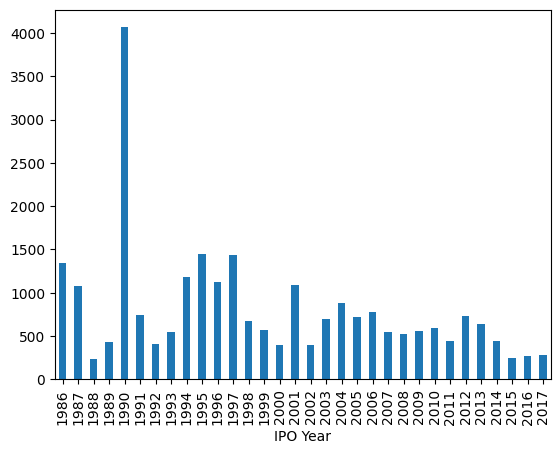

In [86]:
# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

All summary statistics by sector

You can apply the various summary statistics that you have learned about in the last chapter to a groupby object to obtain the result on a per-category basis. This includes the .describe() function, which provides several insights all at once!

Here, you will practice this with the NASDAQ listings. 

In [87]:
# Inspect NASDAQ data
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
 7   Exchange               3167 non-null   object 
dtypes: float64(3), object(5)
memory usage: 198.1+ KB


In [88]:
# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

nasdaq

,Stock Symbol,Company Name,Last Sale,IPO Year,Sector,Industry,Exchange,market_cap_m
0,AAPL,Apple Inc.,141.05,1980.0,Technology,Computer Manufacturing,NASDAQ,740024.467000
1,GOOGL,Alphabet Inc.,840.18,NaN,Technology,"Computer Software: Programming, Data Processing",NASDAQ,580917.530339
2,GOOG,Alphabet Inc.,823.56,2004.0,Technology,"Computer Software: Programming, Data Processing",NASDAQ,569426.124504
3,MSFT,Microsoft Corporation,64.95,1986.0,Technology,Computer Software: Prepackaged Software,NASDAQ,501903.061809
4,AMZN,"Amazon.com, Inc.",884.67,1997.0,Consumer Services,Catalog/Specialty Distribution,NASDAQ,422138.530626
...,...,...,...,...,...,...,...,...
3162,WSFSL,WSFS Financial Corporation,25.70,NaN,Finance,Major Banks,NASDAQ,0.000000
3163,XGTIW,"XG Technology, Inc",6.56,2013.0,Consumer Durables,Telecommunications Equipment,NASDAQ,0.000000
3164,ZNWAA,Zion Oil & Gas Inc,NaN,NaN,Energy,Oil & Gas Production,NASDAQ,0.000000
3165,ZIONW,Zions Bancorporation,9.87,NaN,Finance,Major Banks,NASDAQ,0.000000


In [89]:
# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

summary

Last Sale                                          \
                          count       mean         std     min      25%   
Sector                                                                    
Basic Industries           78.0  21.597679   29.009745  0.0336   2.6325   
Capital Goods             172.0  26.188681   36.596723  0.1500   4.3800   
Consumer Durables          88.0  24.363391   44.399150  0.0498   3.7500   
Consumer Non-Durables     103.0  25.749565   34.669635  0.1996   3.8800   
Consumer Services         348.0  34.917318   67.416144  0.0488   6.8250   
Energy                     65.0  15.496834   22.952420  0.1330   1.9600   
Finance                   627.0  29.644242   61.446557  0.0752  10.7350   
Health Care               645.0  19.462531   46.932855  0.0081   2.1200   
Miscellaneous              89.0  46.094369  186.951618  0.8384   3.5700   
Public Utilities           66.0  18.643705   19.307475  0.2532   5.3325   
Technology                433.0  31.100317   63.761748  0.1800   5.1000   
Transportation             52.0  28.096758   30.627056  0.2300   3.6400   

                                                IPO Year               ...  \
                          50%      75%      max    count         mean  ...   
Sector                                                                 ...   
Basic Industries        8.580  22.4800   114.80     30.0  2000.766667  ...   
Capital Goods          16.020  33.5400   304.00     77.0  2001.324675  ...   
Consumer Durables       9.685  30.6525   354.00     36.0  2003.222222  ...   
Consumer Non-Durables  11.290  34.8600   202.18     41.0  2000.609756  ...   
Consumer Services      20.660  37.5250   884.67    153.0  2004.104575  ...   
Energy                  8.120  17.9800   114.10     29.0  2008.034483  ...   
Finance                21.200  32.7000  1367.00    218.0  2010.321101  ...   
Health Care             6.260  19.3800   764.79    391.0  2009.240409  ...   
Miscellaneous          11.210  34.3300  1738.77     42.0  2004.333333  ...   
Public Utilities       13.150  25.3150   104.46     25.0  2006.040000  ...   
Technology             15.000  37.9500   840.18    274.0  2002.653285  ...   
Transportation         19.000  43.5950   152.05     21.0  1997.809524  ...   

                                       market_cap_m                \
                           75%     max        count          mean   
Sector                                                              
Basic Industries       2011.75  2016.0         78.0    724.899934   
Capital Goods          2012.00  2016.0        172.0   1511.237373   
Consumer Durables      2013.00  2015.0         88.0    839.802607   
Consumer Non-Durables  2011.00  2016.0        103.0   3104.051206   
Consumer Services      2013.00  2017.0        348.0   5582.344175   
Energy                 2016.00  2017.0         66.0    826.607608   
Finance                2015.00  2017.0        627.0   1044.090205   
Health Care            2015.00  2017.0        645.0   1758.709197   
Miscellaneous          2010.75  2016.0         89.0   3445.655935   
Public Utilities       2014.00  2016.0         66.0   2357.865315   
Technology             2012.00  2017.0        433.0  10883.434214   
Transportation         2006.00  2013.0         52.0   2869.660007   

                                                                              \
                                std  min        25%         50%          75%   
Sector                                                                         
Basic Industries        1445.544949  0.0  42.870409  150.385214   721.203429   
Capital Goods           4829.846757  0.0  68.473978  293.801019  1031.733122   
Consumer Durables       1907.604606  0.0  41.234061  177.593858   669.007612   
Consumer Non-Durables  12998.094858  0.0  47.795651  229.930660  1149.085989   
Consumer Services      26492.247636  0.0  79.944770  524.151914  2463.643810   
Energy                  1568.869627  0.0  53.6041

In [90]:
# Unstack 
summary = summary.unstack()

summary

                     Sector               
Last Sale     count  Basic Industries             78.000000
                     Capital Goods               172.000000
                     Consumer Durables            88.000000
                     Consumer Non-Durables       103.000000
                     Consumer Services           348.000000
                                                  ...      
market_cap_m  max    Health Care              118927.210535
                     Miscellaneous             85496.045967
                     Public Utilities          52930.713577
                     Technology               740024.467000
                     Transportation            43005.669415
Length: 288, dtype: float64

Company value by exchange and sector

You can generate more fine-grained summaries of your data by providing a list of columns inside .groupby() and/or applying a statistical method such as .mean() directly to one or more numerical columns.

Here, you will calculate the median market capitalization for each sector, differentiated by the exchange that the companies are listed on. 

In [92]:
# Group listings by Sector and Exchange
by_sector_exchange = listing_data.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

mcap_by_sector_exchange

Sector                 Exchange
Basic Industries       amex         137.318135
                       nasdaq       169.181116
                       nyse        1672.751912
Capital Goods          amex         107.390617
                       nasdaq       477.069539
                       nyse        1898.473017
Consumer Durables      nasdaq       178.278939
                       nyse        1888.834676
Consumer Non-Durables  amex         237.644444
                       nasdaq       367.018066
                       nyse        2479.639848
Consumer Services      amex         179.527440
                       nasdaq       629.151143
                       nyse        1571.218469
Energy                 amex         249.742591
                       nasdaq       300.125044
                       nyse         880.840936
Finance                amex        4603.773150
                       nasdaq       172.592727
                       nyse        1624.029953
Health Care            amex 

In [93]:
# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

mcap_unstacked

Exchange,amex,nasdaq,nyse
Sector,,,
Basic Industries,137.318135,169.181116,1672.751912
Capital Goods,107.390617,477.069539,1898.473017
Consumer Durables,NaN,178.278939,1888.834676
Consumer Non-Durables,237.644444,367.018066,2479.639848
Consumer Services,179.527440,629.151143,1571.218469
Energy,249.742591,300.125044,880.840936
Finance,4603.773150,172.592727,1624.029953
Health Care,103.728355,255.867045,2181.557818
Miscellaneous,59.131037,708.049161,3555.299025


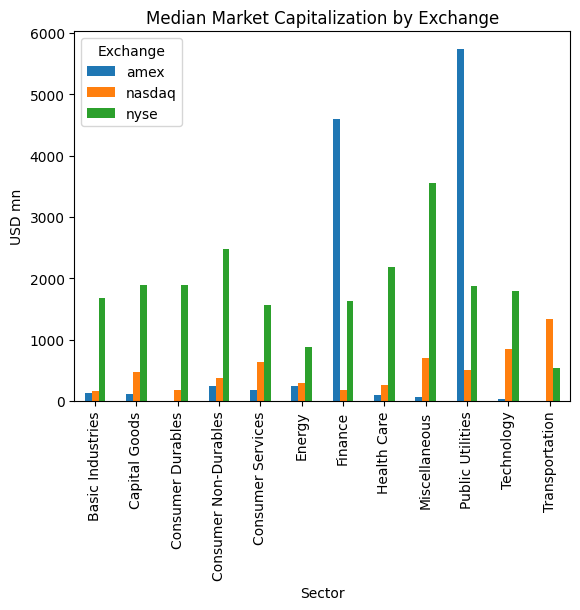

In [94]:
# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.ylabel('USD mn')

# Show the plot
plt.show()

Calculate several metrics by sector and exchange

The .agg() function allows you to aggregate your data in even more ways. Providing a list of names of statistical methods calculates more than one summary statistic at once. You can provide new names for the aggregated columns using the rename method, which takes a dictionary argument where the keys are the names of the metrics you computes and the values are your desired new names.

In this exercise, you will calculate the mean, median, and standard deviation of market capitalizations in millions of USD. 

In [96]:
# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listing_data.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg(['mean', 'median', 'std']).rename(columns={'mean': 'Average', 'median': 'Median', 'std':'Standard Deviation'})

summary

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\2734304910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)


Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        374.323921   137.318135          709.618981
                      nasdaq      824.788760   169.181116         1937.492260
                      nyse       4192.727667  1672.751912         9126.659431
Capital Goods         amex        148.943096   107.390617           95.611487
                      nasdaq     2031.734096   477.069539         6593.280268
                      nyse       5746.444596  1898.473017         8272.670181
Consumer Durables     nasdaq     1045.413873   178.278939         2493.971323
                      nyse       2926.061359  1888.834676         3083.301891
Consumer Non-Durables amex        237.644444   237.644444                 NaN
                      nasdaq     1258.570987   367.018066         1844.221028
                      nyse       6473.559842  2479.639848        13552.556986
Consumer Services     amex        384.352154   179.527440          611.499528
                      nasdaq     6305.025625   629.151143        35542.399355
                      nyse       3581.987193  1571.218469         6233.587643
Energy                amex        249.742591   249.742591          324.786813
                      nasdaq     1156.106446   300.125044         2032.844323
                      nyse       2493.253985   880.840936         3852.830273
Finance               amex       4603.773150  4603.773150                 NaN
                      nasdaq      978.431490   172.592727         3385.688248
                      nyse       7782.199107  1624.029953        16719.747952
Health Care           amex        163.496033   103.728355          177.393679
                      nasdaq     1771.188787   255.867045         7738.743762
                      nyse       8614.620574  2181.557818        20000.536445
Miscellaneous         amex         59.131037    59.131037                 NaN
                      nasdaq     4885.256319   708.049161        14335.506052
                      nyse      23307.024754  3555.299025        59161.455844
Public Utilities      amex       5977.109479  5739.209000         4955.148191
                      nasdaq      682.652627   501.616063          652.457963
                      nyse       6321.737537  1878.593815        10750.340755
Technology            amex         74.052744    37.639075           78.520838
                      nasdaq    10186.196194   849.256672        54235.801335
                      nyse       7548.397108  1787.683850        24388.967377
Transportation        nasdaq     2464.370869  1329.873667         3140.455329
                      nyse       4461.380373   533.183120        14892.608144

Plot IPO timeline for all exchanges using countplot()
                 
To create a basic visualization of the number of observations per category in a dataset, the seaborn countplot() function is usually the way to go:

seaborn.countplot(x=None, hue=None, data=None, ...)

The x parameter contains the names of the variables in the data argument, which is the DataFrame to be plotted. hue identifies an additional categorical variable with color. These are three optional parameters out of many accepted by the function; for a full list, check out the seaborn documentation.

Let's use this tool to compare the timeline of IPO activity across the three exchanges. 

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\141447085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)


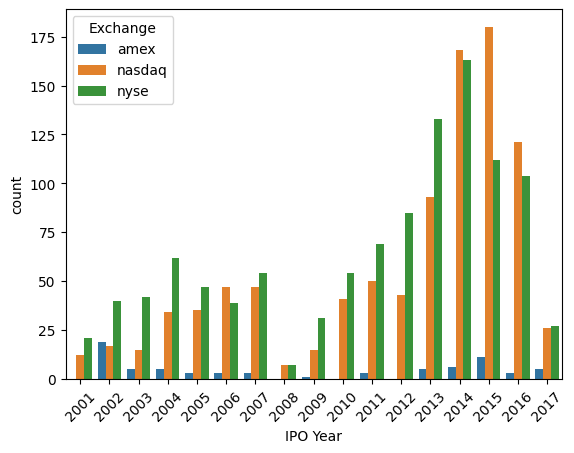

In [97]:
# Select IPOs after 2000
listing_data = listing_data[listing_data['IPO Year'] > 2000]

# Convert IPO Year to integer
listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listing_data)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

Global median per capita income over time

The seaborn barplot() function shows point estimates and confidence intervals as rectangular bars; the default function displays the mean, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:

seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)

In this exercise, you will use an imported World Bank dataset containing global income per capita data for 189 countries since the year 2000. To practice displaying summary statistics per category, you will plot and compare the median global income per capita since 2000 to the mean.

In [113]:
income_trend_wide = pd.read_excel('Income by Country.xlsx')
income_trend_wide

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.466,0.44,0.431,0.376,0.328,0.381,0.366,0.354,0.343,...,0.409,0.426,0.421,0.435,0.438,0.436,0.435,0.434,0.434,0.432
1,Albania,0.572,0.521,0.506,0.526,0.541,0.563,0.578,0.561,0.576,...,0.686,0.693,0.699,0.7,0.705,0.707,0.711,0.717,0.721,0.727
2,Algeria,0.695,0.687,0.687,0.683,0.677,0.678,0.681,0.681,0.688,...,0.731,0.735,0.734,0.734,0.735,0.737,0.739,0.745,0.743,0.743
3,Andorra,0.936,0.934,0.929,0.923,0.922,0.923,0.929,0.942,0.947,...,0.924,0.916,0.91,0.91,0.914,0.92,0.924,0.928,0.931,0.935
4,Angola,0.562,0.576,0.431,0.428,0.388,0.506,0.505,0.53,0.527,...,0.615,0.614,0.613,0.622,0.626,0.63,0.629,0.62,0.617,0.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Sub-Saharan Africa,0.494,0.491,0.483,0.478,0.473,0.476,0.479,0.481,0.481,...,0.517,0.521,0.524,0.527,0.531,0.536,0.537,0.536,0.535,0.535
204,Least Developed Countries,0.395,0.392,0.383,0.382,0.372,0.381,0.387,0.392,0.396,...,0.458,0.462,0.467,0.472,0.474,0.481,0.485,0.487,0.49,0.494
205,Small Island Developing States,0.64,0.642,0.646,0.65,0.656,0.663,0.669,0.676,0.675,...,0.723,0.737,0.739,0.742,0.745,0.747,0.751,0.752,0.753,0.755
206,Organization for Economic Co-operation and Dev...,0.846,0.846,0.848,0.849,0.852,0.855,0.858,0.863,0.866,...,0.887,0.891,0.893,0.894,0.896,0.898,0.9,0.902,0.905,0.907


In [127]:
income_trend = pd.melt(income_trend_wide, id_vars=['Country'], var_name='Year', value_name='Income')
income_trend['Income'] = pd.to_numeric(income_trend['Income'], errors='coerce')
income_trend

,Country,Year,Income
0,Afghanistan,1990,0.466
1,Albania,1990,0.572
2,Algeria,1990,0.695
3,Andorra,1990,0.936
4,Angola,1990,0.562
...,...,...,...
6027,Sub-Saharan Africa,2018,0.535
6028,Least Developed Countries,2018,0.494
6029,Small Island Developing States,2018,0.755
6030,Organization for Economic Co-operation and Dev...,2018,0.907


In [128]:
# Inspect the data
income_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6032 non-null   object 
 1   Year     6032 non-null   object 
 2   Income   5936 non-null   float64
dtypes: float64(1), object(2)
memory usage: 141.5+ KB


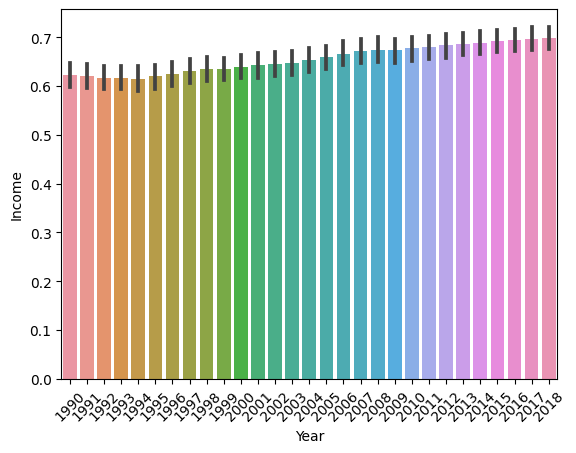

In [130]:
# Create barplot
sns.barplot(x='Year', y='Income', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

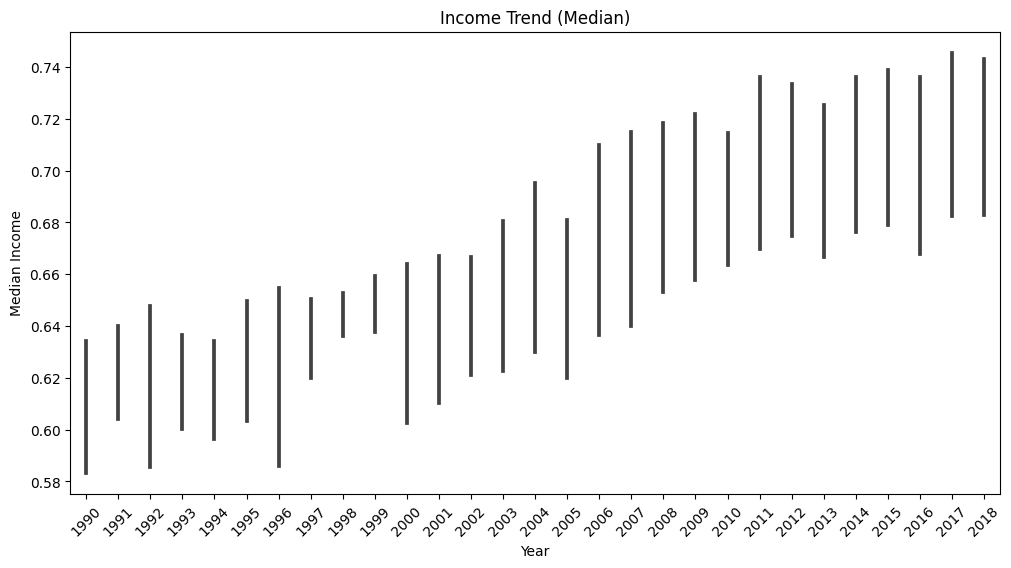

In [137]:
# Create the second bar plot with median estimator
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Income', data=income_trend, estimator=np.median)
plt.xticks(rotation=45)
plt.title('Income Trend (Median)')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.show()

Calculate several metrics by sector and IPO year

The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:

seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)

In this exercise, you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile.

In [138]:
# Exclude IPOs before 2000 and from the 'amex'
listing_data = listing_data[(listing_data['IPO Year'] > 2000) & (listing_data.Exchange != 'amex')]

# Convert IPO Year to integer
listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)

# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

listing_data.market_cap_m.quantile(.95)

C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\575568607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)
C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\575568607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)


9155.17179368

In [139]:
# Exclude outliers
listing_data = listing_data[listing_data.market_cap_m < listing_data.market_cap_m.quantile(.95)]

listing_data

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange,market_cap_m
144,JAZZ,Jazz Pharmaceuticals plc,153.11,9.147133e+09,2007,Health Care,Major Pharmaceuticals,nasdaq,9147.133142
145,ALGN,"Align Technology, Inc.",113.73,9.135186e+09,2001,Health Care,Industrial Specialties,nasdaq,9135.186310
147,CDW,CDW Corporation,56.78,9.048863e+09,2013,Consumer Services,Catalog/Specialty Distribution,nasdaq,9048.863313
165,SPLK,Splunk Inc.,59.49,8.224284e+09,2012,Technology,Computer Software: Prepackaged Software,nasdaq,8224.284344
168,HDS,"HD Supply Holdings, Inc.",39.55,7.978373e+09,2013,Consumer Services,Office Equipment/Supplies/Services,nasdaq,7978.373249
...,...,...,...,...,...,...,...,...,...
3134,YUME,"YuMe, Inc.",3.85,1.310482e+08,2013,Technology,Advertising,nyse,131.048160
3135,ZAYO,"Zayo Group Holdings, Inc.",33.02,8.060680e+09,2014,Public Utilities,Telecommunications Equipment,nyse,8060.680437
3136,ZEN,"Zendesk, Inc.",28.18,2.772825e+09,2014,Technology,EDP Services,nyse,2772.824896
3137,ZPIN,Zhaopin Limited,17.85,9.955009e+08,2014,Technology,Professional Services,nyse,995.500944


C:\Users\Alienware\AppData\Local\Temp\ipykernel_3312\3682302796.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listing_data, estimator=np.mean, ci=95)


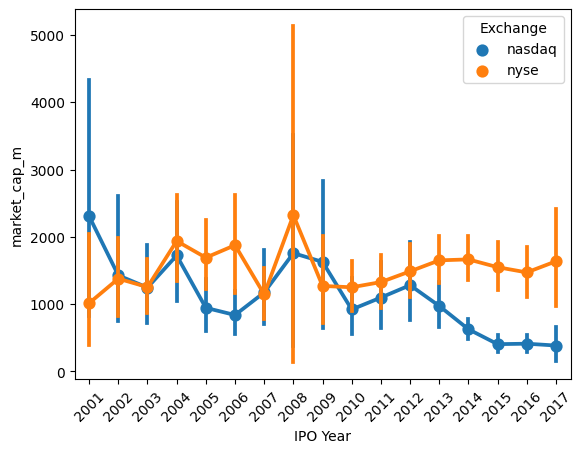

In [155]:
# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listing_data, estimator=np.mean, ci=95)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

Inflation trends in China, India, and the US

Finally, the seaborn package includes functions that allow you to visualize the distribution of levels of categorical variables.

In the next two exercises, you will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED. 

In [186]:
inflation = pd.read_csv('inflation.csv', usecols=[0, 1, 2], index_col=0)
# inflation.drop_duplicates(inplace=True)
inflation

,Country,Inflation
Date,,
1960-01-01,India,1.780
1961-01-01,India,1.695
1962-01-01,India,3.632
1963-01-01,India,2.946
1964-01-01,India,13.355
...,...,...
2019-01-01,USA,1.812
2020-01-01,USA,1.234
2021-01-01,USA,4.698


In [187]:
# Inspect the inflation data
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 1960-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    192 non-null    object 
 1   Inflation  165 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


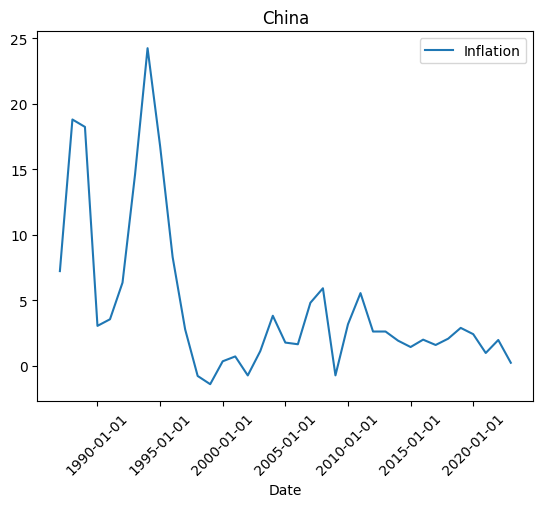

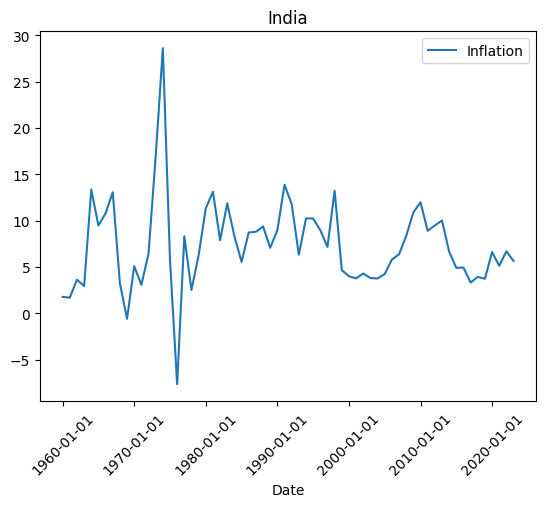

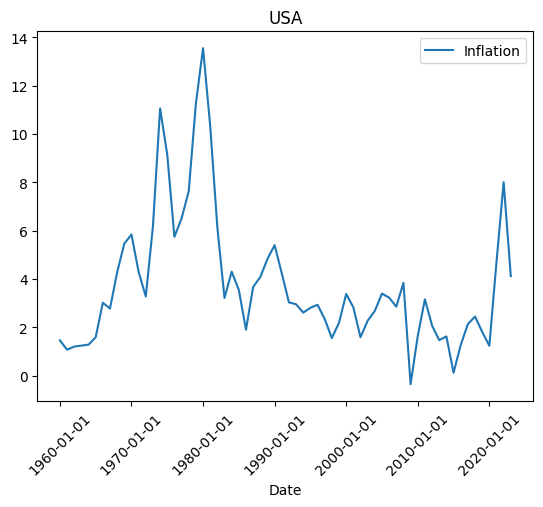

In [188]:
# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    plt.xticks(rotation=45)
    # Show the plot
    plt.show()

Distribution of inflation rates in China, India, and the US

As you saw in the video, the boxplot() function displays key quantiles of a distribution with respect to categories, where y represents a quantitative variable, and x a categorical variable. In statistics, this kind of distribution is known as a box-and-whisker plot.

A complement to a box plot is a swarmplot(), which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to boxplot():

seaborn.boxplot(x=None, y=None, data=None, ...)

seaborn.swarmplot(x=None, y=None, data=None, ...)

In this final exercise, you will compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends.

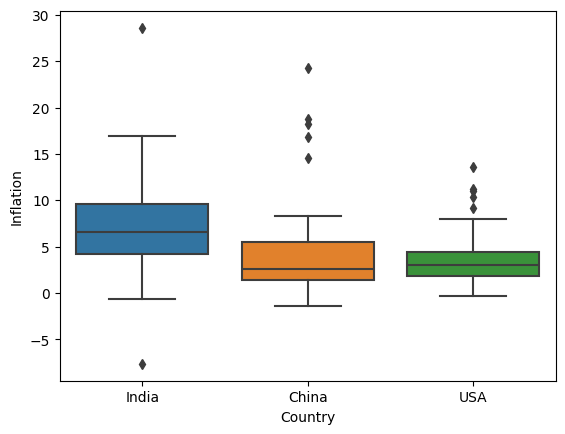

In [189]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

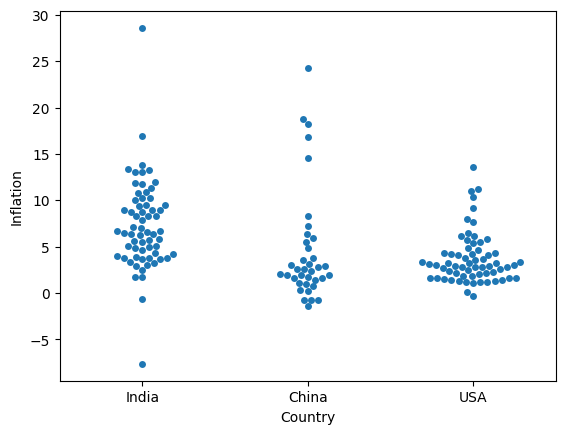

In [192]:
inflation = pd.read_csv('inflation.csv', usecols=[0, 1, 2])

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()